<a href="https://colab.research.google.com/github/hsantos1985/core_projects/blob/main/Case_empresa_entregas_s_hiper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Empresa
Os dados são pertencentes a uma empresa de entregas de alimentos que necessita verificar se os clientes irão aceitar uma nova campanha, sendo que já ocorreram outras.

#Objetivo
Criar um modelo que possa prever se o cliente irá aceitar uma nova campanha ou não

Tirar insights do dataset

#Dados
O data set contém variáveis sociodemográficas e firmográficas de 2240 consumidores que foram contatados pela empresa em campanhas anteriores

#Variavel target
Response(target) 1 se o cliente aceitou a oferta da última campanha e 0 o contrário

#Etapas para execução
Para realizar a análise serão executadas as etapas abaixo:

1 - Importar as biliotecas

Importar as bibliotecas necessárias para executar o case

2 - Limpeza dos dados

Baixar o dataset e fazer análises iniciais das variáveis (tipos e valores faltantes)

3 - EDA (Análise exporatória de dados)

Executar a análise exploratória de dados para obter as análises descritivas das variáveis e possíveis trataentos para os valores faltantes

4 - Escolha do melhor modelo

Escolher o modelo com melhor performance em termos de indicadores gerais

5 - Criação do modelo preditivo

Criar o modelo preditivo

6 - Medição da qualidade do modelo

Análisar os indicadores da qualidade do modelo para verificar se este está adequado

7 - Conclusão

Fazer a conclusão do modelo





#1 - Importar as bibliotecas

In [ ]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, RocCurveDisplay, auc, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline


#metricas
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score,recall_score,precision_score,classification_report, RocCurveDisplay, auc, roc_curve, f1_score

#2 - Análise inicial do dataset

In [ ]:
#conectando ao Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Lendo o arquivo csv
df=pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
#Verificando inicialmente as variáveis
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
#Verificando o tipo das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#Contando as variáveis e suas médias valores maximo, mim, entre outros
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


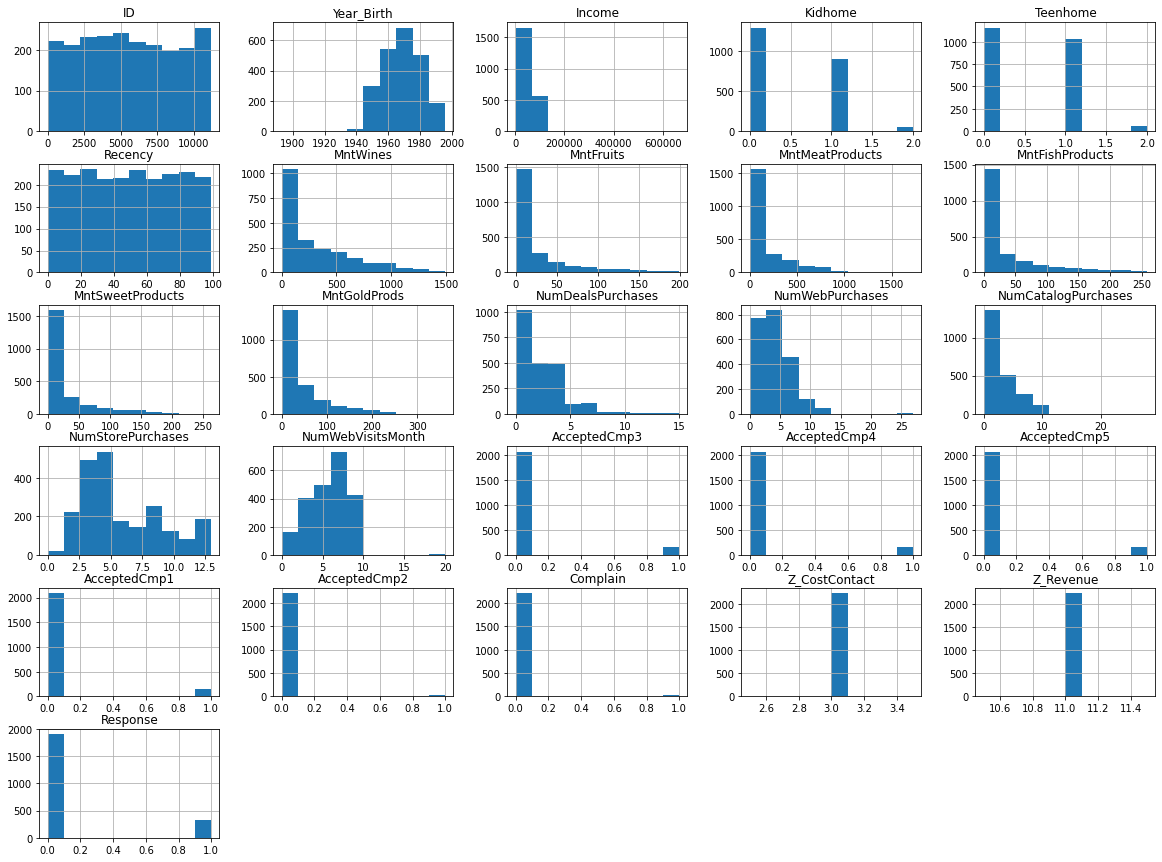

In [ ]:
#analisando o histograma das variáveis
df.hist(figsize=(20,15))
plt.show();

In [ ]:
# Inserção dos valores faltantes na variável Income, desta forma, serão inseridos os valores de renda pela média do ano de nascimento
df['Income'].isnull().sum()

24

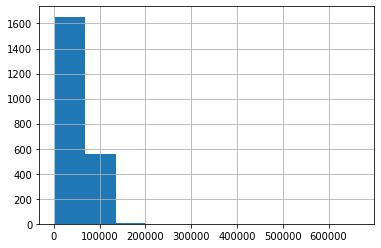

In [ ]:
#Plotando esta variável antes do preenchimento da média
df['Income'].hist();

In [ ]:
#inserindo as médias por ano na variável "Income"
df['Income']=df.groupby('Year_Birth')['Income'].apply(lambda grp:grp.fillna(np.mean(grp)))

In [ ]:
#Contando os nulos após a inserção dos dados
df['Income'].isnull().sum()

0

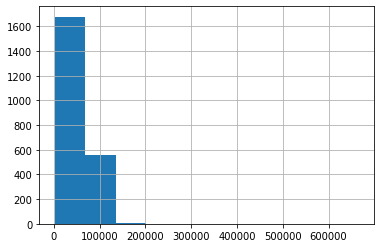

In [ ]:
#Verificando a distribuições da variável "Income" após a inserção dos dados não nulos
df['Income'].hist();

In [ ]:
#Verifica-se que não houve modificação da distribuição da variável ao inserir a média

In [ ]:
#checando duplicdade das linhas
df.duplicated().sum()

0

In [ ]:
#checando a duplicdade das colunas
df.T.duplicated().sum()

0

In [ ]:
#Verificação das variáveis categóricas  Education, Marital_Status
colunas=['Education','Marital_Status']

for n in colunas:
  valores=df[n].value_counts()
  print(f'====== A coluna {n} possui as seguintes categorias: \n {valores} ===========')
  print('\n')

====== A coluna Education possui as seguintes categorias: 
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64 ===========


====== A coluna Marital_Status possui as seguintes categorias: 
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 ===========




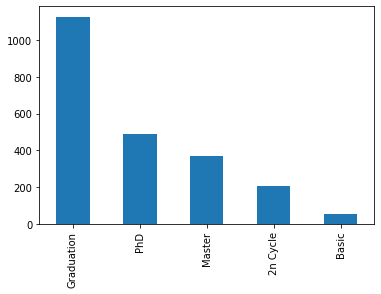

In [ ]:
#Verificação gráfica das variáveis categóricas
df['Education'].value_counts().plot(kind='bar');

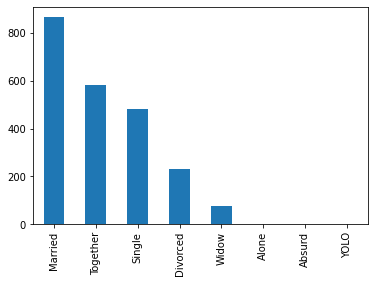

In [ ]:
df['Marital_Status'].value_counts().plot(kind='bar');

In [ ]:
#Analisando as categorias da coluna Marital_status verificou-se que é possível juntar as categorias Widow,Alone, Absurd e YOLO em uma só
#inserindo as categorias Alone, Absurd e Yolo e Widow em uma nova catgoira 'Outros'

df['Marital_Status'].replace(['Widow','Absurd','Alone','YOLO'],['Others','Others','Others','Others'],inplace=True)

print(df['Marital_Status'].value_counts())


Married     864
Together    580
Single      480
Divorced    232
Others       84
Name: Marital_Status, dtype: int64


In [ ]:
#Verificando a existência de colunas constantes
col_constantes=[]

for col in df.columns:
  if len(df[col].unique())==1:
    col_constantes.append(col)
  else:
      print(f'{col} OK')

ID OK
Year_Birth OK
Education OK
Marital_Status OK
Income OK
Kidhome OK
Teenhome OK
Dt_Customer OK
Recency OK
MntWines OK
MntFruits OK
MntMeatProducts OK
MntFishProducts OK
MntSweetProducts OK
MntGoldProds OK
NumDealsPurchases OK
NumWebPurchases OK
NumCatalogPurchases OK
NumStorePurchases OK
NumWebVisitsMonth OK
AcceptedCmp3 OK
AcceptedCmp4 OK
AcceptedCmp5 OK
AcceptedCmp1 OK
AcceptedCmp2 OK
Complain OK
Response OK


In [ ]:
#dropando a coluna ID
df.drop(columns=['ID','Dt_Customer'],axis=1,inplace=True)

In [ ]:
df = df.reindex(df['Year_Birth'].index)


In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
#Conclusão da etapa 2 de limpeza de dados
#verificou - se que apenas a variável "Income" possui valores faltantes
#Para preencher estes valores foram inseridos valores das médias relacionadas ao ano de nascimento dos clientes
#Foi feito agrupamento de 4 categorias da variável Marital Status, pois estas não tinham quantidade relevante
#Não foram encontradas, linhas e colunas duplicadas, assim como colunas constates

#3 EDA (Análise Exporatória de Dados)

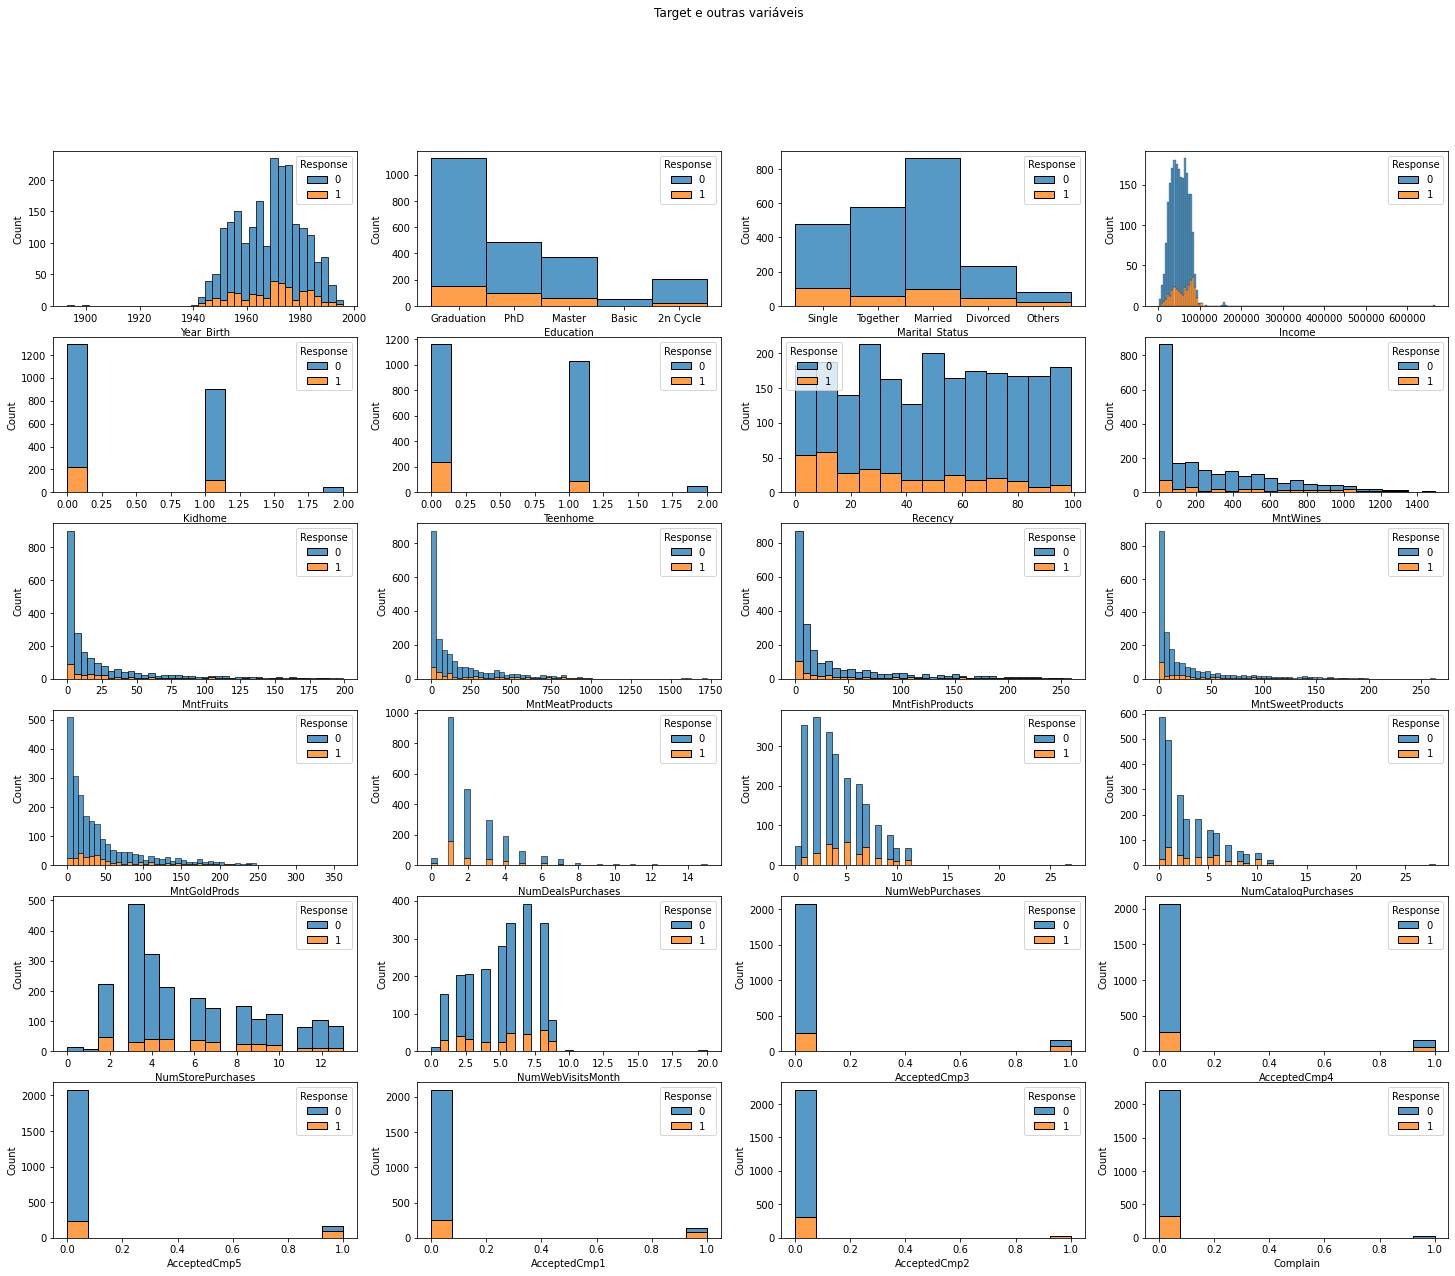

In [ ]:
#verificanco a relação da variável target com as outras features


columns = df.columns
fig, axes = plt.subplots(6, 4, figsize=(25, 20),sharey=False)
fig.suptitle('Target e outras variáveis')

feature=0
for row in range(0,6):
    for col in range(0,4):
        sns.histplot(ax=axes[row, col], data=df, x=columns[feature], hue="Response", multiple="stack")
        feature += 1

In [ ]:
#Conclusões preliminares
#1-Percebe-se que maior parte dos clientes não aceitaram a última campanha
#2 - Clientes que são casados ou solteiros aceitaram mais a última campanha
#3- Clientes que fizeram compras mais recentemente aceitaram masi a última campanha
#4 - Clientes sem reclamações aceitaram mais a última campanha
#5 - Clientes com graduação aceitaram mais a útima campanha
#6 - Clientes que nasceram nos anso de 1970 e 1980 aceitaram mais a última campanha


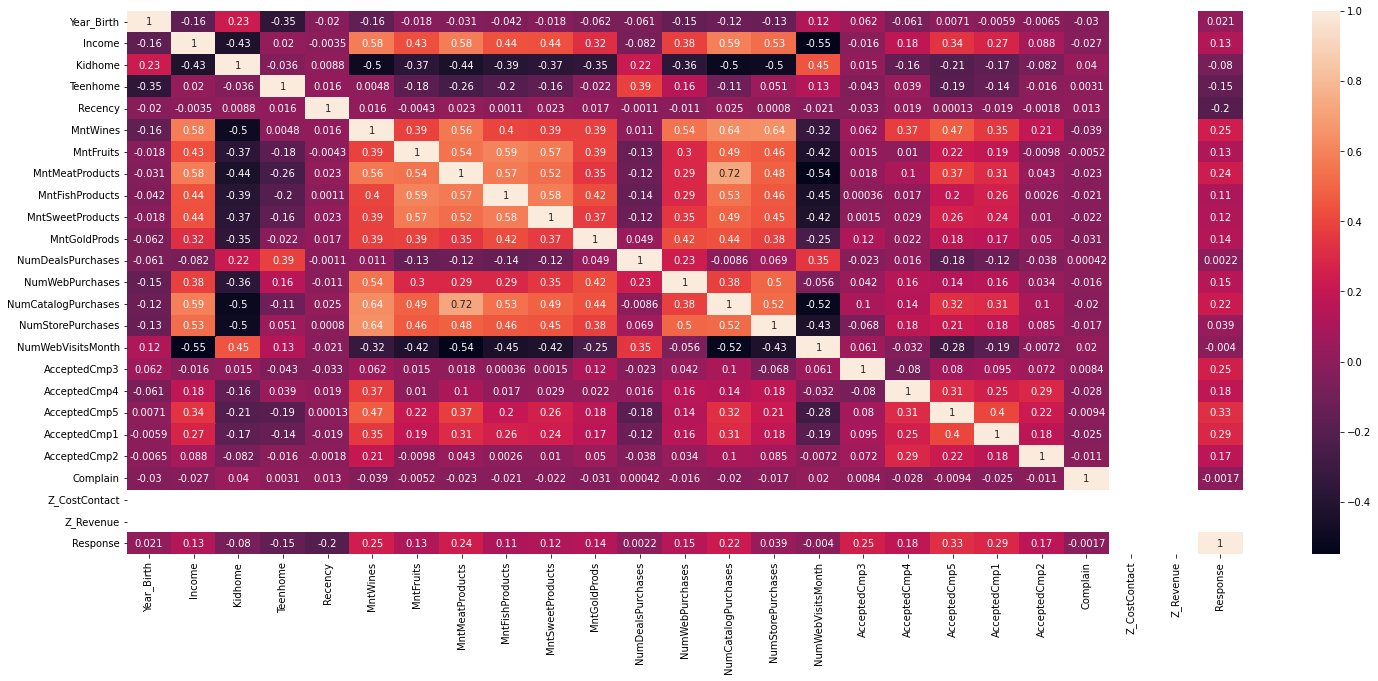

In [ ]:
# matriz de correlação
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
#filtrando as variáveis com correlação maior que 0.5
df_cor=df.corr(method='pearson').abs()
df_cor[df_cor>=0.5].T

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Year_Birth,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,NaN,1.000000,NaN,NaN,NaN,0.576615,NaN,0.576827,NaN,NaN,...,0.549210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kidhome,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teenhome,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntWines,NaN,0.576615,NaN,NaN,NaN,1.000000,NaN,0.562667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntFruits,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.543105,0.594804,0.567164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntMeatProducts,NaN,0.576827,NaN,NaN,NaN,0.562667,0.543105,1.000000,0.568402,0.523846,...,0.539470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntFishProducts,NaN,NaN,NaN,NaN,NaN,NaN,0.594804,0.568402,1.000000,0.579870,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntSweetProducts,NaN,NaN,NaN,NaN,NaN,NaN,0.567164,0.523846,0.579870,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


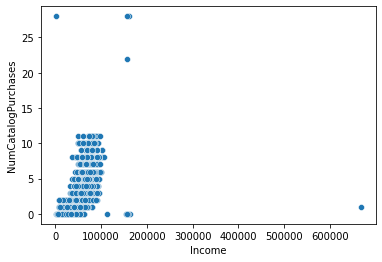

In [ ]:
#Analisando a correlação entre Income e NumCatalogPurchases
sns.scatterplot(x=df['Income'], y=df['NumCatalogPurchases'])

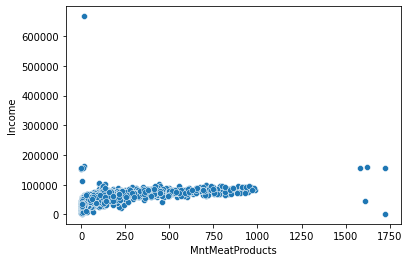

In [ ]:
#Analisando a correlação entre MntMeatProducts e Income
sns.scatterplot(x=df['MntMeatProducts'], y=df['Income'])

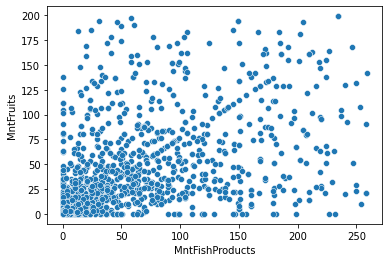

In [ ]:
#Analisando a correlação entre MntFishProducts e MntFruits
sns.scatterplot(x=df['MntFishProducts'], y=df['MntFruits'])

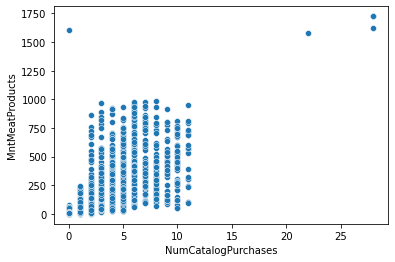

In [ ]:
#Analisando a correlação entre NumCatalogPurchases e MntWines
sns.scatterplot(x=df['NumCatalogPurchases'], y=df['MntMeatProducts'])

In [ ]:
#Analisando a etapa de EDA verificou-se que não há uma relação de causalidade entre as variáveis que possui correlações
#Variáveis como MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts e MntGoldProds possuem distribuições de variáveis parecidas
#A variável Income possui pouca correlação com as variáveis
#Vale analisar com amis detalhes a relação entre MntFishProducts e MinFruits, pois no scatterplot entre estas variáveis foi possível percerber
# Uma possível causalidade incial. Percebe-se que a correlação de Pearson para estas variáveis é de 0,59

#4 - Escolha do modelo preditivo

In [ ]:
#Criando as variáveis x e y

x=df.drop(columns=['Response'],axis=1) #dropando o target
y=df['Response']

In [ ]:
#criando pipline para a conversão das variáveis e a padronização delas
ct = ColumnTransformer( [ ( 'ohe', OneHotEncoder(), [ 'Education','Marital_Status']  ),
                         ( 'standard', StandardScaler(), ['Income' ] )]
,                         remainder = 'passthrough')

In [ ]:
#Criando o as variáveis train, test,split
x_train, x_test, y_train, y_test = train_test_split(x, y) #fazendo o split

In [ ]:
#Verificando o melhor modelo de classificação

modelos={'SVC_normal':SVC(),
         'SVC_balanced':SVC(class_weight='balanced'),
         'Reglog':LogisticRegression(),
         'KNC':KNeighborsClassifier(),
         'DecisionTreeC':DecisionTreeClassifier(),
         'DecisionTreeC_B':DecisionTreeClassifier(class_weight='balanced'),
         'RandomForestC':RandomForestClassifier(),
         'RandomForestC_B':RandomForestClassifier(class_weight='balanced')
}

nomes = []
accuracy = []
precision = []
recall = []
f1 = []

for titulo in modelos.keys():
  model=modelos.get(titulo)
  model=make_pipeline(ct,model)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)


  nomes.append(titulo)
  accuracy.append(accuracy_score( y_true = y_test, y_pred = y_pred))
  precision.append(precision_score(y_true = y_test, y_pred = y_pred, average="macro" ))
  recall.append(recall_score(y_true = y_test, y_pred = y_pred, average="macro" ))
  f1.append(f1_score(y_true = y_test, y_pred = y_pred))

resultados = pd.DataFrame({"Modelo":nomes, "Accuracy":accuracy, "Precision":precision, "Recall":recall,"F1":f1})

resultados.sort_values(by="F1",ascending=False).T


Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,6,7,4,1,5,2,3,0
Modelo,RandomForestC,RandomForestC_B,DecisionTreeC,SVC_balanced,DecisionTreeC_B,Reglog,KNC,SVC_normal
Accuracy,0.867857,0.866071,0.816071,0.723214,0.8125,0.855357,0.833929,0.85
Precision,0.751586,0.750111,0.638264,0.586074,0.626372,0.711832,0.622268,0.425
Recall,0.642857,0.627101,0.636905,0.636204,0.620098,0.581583,0.559174,0.5
F1,0.421875,0.390244,0.383234,0.356846,0.355828,0.283186,0.231405,0.0


In [ ]:
#Através da análise anterior verifica-se que com exceção do SVC todos os modelos obtiveram uma acurácia de mais de 82%
#Ou seja, quase todos os modelos conseguiram classificar corretamente em mais de 82%
# O Random Forest obteve a maior acurácia 88,9%
#Em relação a Precision os modelos de Random Forest conseguiram classificar o target em mais de 86%
#Ou seja, os modelos de Random Forest conseguiram classificar positivamente a variável target, quando realmente esta era positiva 86%
#Em relação ao Recall a DecisionTree conseguiu obter um valor de 65%, ou seja, em 65% das classificações positivas do target
#Eram realmente positivas
#E relação ao F1 Score que mede a qualidade geral do modelo (relacionando, recall e precision) o F1 para o Random Forest é o maior
#Isto confirma a escolha do Random Forest, já com uma acurácia maior
#O RandomForest Classifier sem balanceamento foi o escolhido

#5 - Criação do modelo preditivo

In [ ]:
#Utilização da Random Forest
model=make_pipeline(ct,RandomForestClassifier())
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

#6 - Medição da qualidade do modelo

In [ ]:
#Calculando a acurácia, precisão e recall
print( 'Accuracy', accuracy_score( y_test, y_pred ) )
print( 'Precision', precision_score( y_test, y_pred ) )
print( 'Recall', recall_score( y_test, y_pred ) )

Accuracy 0.8696428571428572
Precision 0.627906976744186
Recall 0.32142857142857145


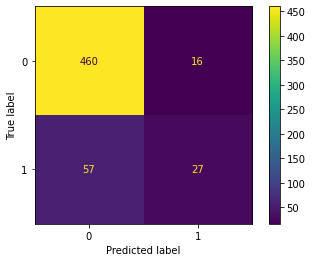

In [ ]:
#Verificando matriz de consufusão
ConfusionMatrixDisplay.from_predictions( y_test, y_pred );

In [ ]:
import pandas as pd

feature_names = model[:-1].get_feature_names_out()

mdi_importances = pd.Series(
    model[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

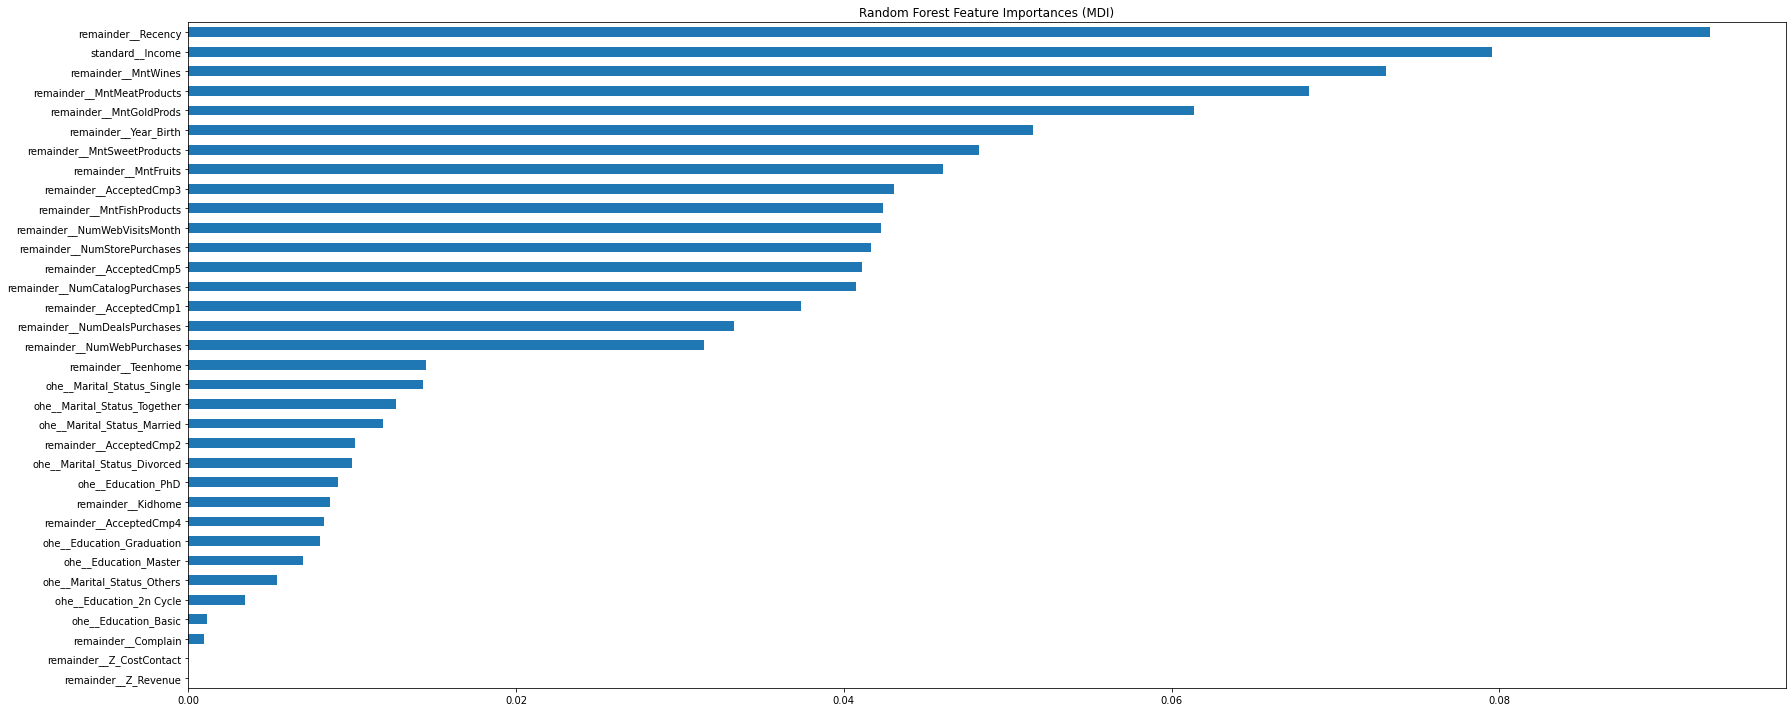

In [ ]:
plt.figure(figsize=(25,10))
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()
plt.show()

#7 - Conclusão

In [ ]:
#Foi utilizado o modelo de random forest o qual obteve melhor acurácia se comparado com os outros modelos
#O RandomForest obteve a acurácia de 86%
#Isto é, em 86% dos casos o modelo vai conseguir prever se o cliente vai aceitar uma nova oferta
#As top 10 variáveis maior peso no modelo são:
 #1-Recency-Número de dias que foi feita a última compra
 #2-Income - Renda dos clientes no último ano
 #3-MntWines - Quantidade modetária gasta de vinho nos últimos 2 anos
 #4-MntMeatProducts - Quantidade modetária gasta de carne nos últimos 2 anos
 #5-MntGoldsProds - Quantidade modetária gasta de produtos ouro nos últimos 2 anos
 #6-YearBirth - Ano de nascimento do cliente
 #7-MntSweetProducts - Quantidade modetária gasta de produtos "doces" nos últimos 2 anos
 #8-MntFruits- Quantidade modetária gasta de frutas nos últimos 2 anos
 #9-AcceptdCmp3 - 1 se o cliente aceitou a oferta na 3ªcampanha, 0 ao contrário
 #10 - MntFishProducts - Quantidade modetária gasta de peixe nos últimos 2 anos

#Como próximos passos, pode ser procurado os hiperparâmetros para obter melhores indicadores do RandomForest
#Pode ser feita ua análise mais profunda entre os clientes que compram mais frutas e peixas, conforme mostrado na análise
